# DECISION TREES

* High accuracy, stability and ease of interpretation
* Allow for mapping of non-linear relationships
* Adaptable at solving both classification and regression problems

KEY WORDS: decision trees, random forest, gradient boosting

### 1) Definition

Supervised learning algorithm (with predefined target variable), mostly used in classification problems. It works for both categorical and continuous input and output variables. The population or sample is split into sub-populations based on the most significant splitter/differentiatior in inut variables.

### 2) Terminology

* ROOT NODE: represents the entire sample, which gets further divided into two or more subsets.
* SPLITTING: process of dividing a node into two or more subnotes.
* DECISION NODE: when a subnode splits into further sub-nodes
* TERMINAL NODE / LEAF: a node which does not split any further
* PRUNING: removal of subnodes (opposite of splitting)
* BRANCH / SUBTREE: subsection of entire treee
* PARENT AND CHILD NODES: node that is divided and nodes they get divided into to

![title](dt_terminology.png)

### 3) Advantages

* Easy to understand: even for people from non technical background; it does not need any statistical knowledge to read and interpret them. Intuitive graphical representation, easy to relate to initial hypothesis.
* Useful in data expliration: decision trees are one of the fastest way to identify most significant variables and the relation among them. This method can help to create new features with more power to predict target variable. It can also help to identify most significant variables in the data exploration stage
* Less data cleaning required: not influenced by outliers and missing values to a fair degree
* No data type constraints: can handle both numerical and categorical variables
* Non-parametric method: decision trees have no assumptions about the space distribution and the classifier structure

### 4) Disavantages

* Overfitting: to solve this problem set constraints on model parameteres and apply pruning
* Not fit for continuous variables: while working with continuous variables, decision trees loose information when they categorize them into different categories.

# REGRESSION TREE vs CLASSIFICATION TREE

* Regression trees are used when dependent variable is continuous. Classification trees are used when dependent variable is categorical.
* In case of regression tree, the value obtained by terminal nodes in the training data is the mean response of observation falling in that region. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mean value.
* In case of classification tree, the value (class) obtained by terminal node in the training data is the mode of observations falling in that region. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mode value.
* Both the trees divide the predictor space (independent variables) into distinct and non-overlapping regions. For the sake of simplicity, you can think of these regions as high dimensional boxes or boxes.
* Both the trees follow a top-down greedy approach known as recursive binary splitting. We call it as ‘top-down’ because it begins from the top of tree when all the observations are available in a single region and successively splits the predictor space into two new branches down the tree. It is known as ‘greedy’ because, the algorithm cares (looks for best variable available) about only the current split, and not about future splits which will lead to a better tree.
* This splitting process is continued until a user defined stopping criteria is reached. For example: we can tell the the algorithm to stop once the number of observations per node becomes less than 50.
* In both the cases, the splitting process results in fully grown trees until the stopping criteria is reached. But, the fully grown tree is likely to overfit data, leading to poor accuracy on unseen data. This bring ‘pruning’. Pruning is one of the technique used tackle overfitting. We’ll learn more about it in following section.

![title](types_of_decision_trees.png)

# SPLITTING OF TREES

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different
for classification and regression trees. 

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

The algorithm selection is also based on type of target variables. There are four most commonly used algorithms in decision trees.



## 1) GINI index

## 2) Chi Square

## 3) Information gain

## 4) Reduction in variance

# KEY PARAMETERS OF TREE MODELING

# TREE BASED MODELS vs LINEAR MODELS

# DECISION TREES IN PYTHON

## Regression tree

Avg score: -0.059550519047178785


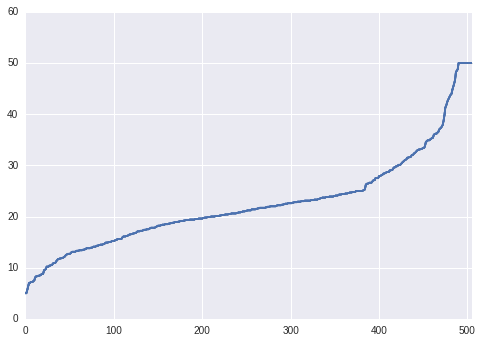

In [34]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn import tree
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
# for classification, here you can change the algorithm as gini or entropy (information gain) 
# by default it is gini  
regressor = tree.DecisionTreeRegressor(criterion='mse', splitter='best', random_state=1) 

X, y = load_boston(return_X_y=True)
scores = cross_val_score(regressor, X, y, cv=10)
print('Avg score: {}'.format(np.mean(scores)))
ax = sns.tsplot(sorted(y))
ax.errorbar(range(0, len(y)), sorted(y), yerr=np.nanmean(scores))
plt.show()

In [37]:
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model using the training sets and check score
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred) 

0.75390698764642017

**Q: What is the best way to evaluate a regression tree?** 

**A:** Ever since the late, great Leo Breiman in the 90s (author of the original book about CART), the statistical industry has enshrined optimizing predictive accuracy (PA, alternatively, minimizing the mean squared error) as the gold standard metric for performance evaluation and model validation. Minimizing the mean squared error) as the gold standard metric for performance evaluation and model validation.

That PA has evolved to this status is understandable: it’s easily calibrated and for the most part is a consistent statistic for internal model validation. However, all too often it is the sole criterion for model value, without thought given to wider business impact, and despite its being prone to p-hacking, gaming, and analyst fraud.

My real point is that PA is not the only metric for model validation. Should the analyst be willing to sacrifice some PA by factoring in other considerations? Which combination of possible metrics will satisfy constraints wrt PA and derive the strongest strategic insights and confidence in the predictions in the face of truly out-of-sample information and the uncertainty inherent in all future projections?

**A:** Since you used cross-validation, MSE is the error you want to look at because it's the error from your testing set, and approximation of the true testing error.

If you use other algorithms with cross-validation, MSE is still appropriate.

You would only want to use an adjustment to MSE--like AIC, BIC, adj. R^2--if you only ran your models on the training set without any sort of validation.

## Classification tree

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
# for classification, here you can change the algorithm as gini or entropy (information gain) 
# by default it is gini  
model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=1) 
# model = tree.DecisionTreeRegressor() for regression

iris = load_iris()
X, y = load_iris(return_X_y=True)
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model using the training sets and check score
model.fit(X_train, y_train)
model.score(X_train, y_train)
#Predict Output
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

for i in range(1, len(y_test)):
    res = 'correct' if y_test[i-1]==y_pred[i-1] else 'wrong'
    # print(y_test[i-1], y_pred[i-1], res)

print('Classification score: {}%'.format(score*100))

Classification score: 98.0%


The split between train and test is fixed, by defining the random state.  if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2, i.e. your split will be always the same. It doesn't matter what the actual random_state number is 42, 0, 21, ... The important thing is that everytime you use 42, you will always get the same output the first time you make the split. This is useful if you want reproducible results, for example in the documentation, so that everybody can consistently see the same numbers when they run the examples. In practice I would say, you should set the random_state to some fixed number while you test stuff, but then remove it in production if you really need a random (and not a fixed) split.

** Q: If the variance is not coming from the training set, then why is the result not always the same? Is there variability inroduced in the decision tree classifier? **

**A:** The DecisionTreeClassifier works by repeatedly splitting the training data, based on the value of some feature. The Scikit-learn implementation lets you choose between a few splitting algorithms by providing a value to the splitter keyword argument.

"best" randomly chooses a feature and finds the 'best' possible split for it, according to some criterion (which you can also choose; see the methods signature and the criterion argument). It looks like the code does this N_feature times, so it's actually quite like a bootstrap.

"random" chooses the feature to consider at random, as above. However, it also then tests randomly-generated thresholds on that feature (random, subject to the constraint that it's between its minimum and maximum values). This may help avoid 'quantization' errors on the tree where the threshold is strongly influenced by the exact values in the training data.

### Tree Visualization

In [54]:
from sklearn.externals.six import StringIO
import pydot

tree.export_graphviz(model,
                    out_file='tree.dot',
                    feature_names=iris.feature_names,
                    class_names=iris.target_names,
                    filled=True,
                    rounded=True,
                    impurity=False)

# dot -Tpng tree.dot -o tree.png


In [59]:
!rm tree.png
!dot -Tpng tree.dot -o tree.png

![title](tree.png)

# ENSEMBLE METHODS IN TREE BASED MODELING

# BAGGING

# RANDOM FORESTS

# BOOSTING

# GBM vs XGBOOST

# GBM IN PYTHON

# XGBOOST IN PYTHON

#### References

https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/